# Herbert Dias Project 3

# CLUSTER ANALYSIS (UNSUPERVISED LEARNING)

## Step 1 Import the data as a dataframe for analysis

In [649]:
import pandas as pd
import numpy as np

df = pd.read_csv("World_Covid19_cases.csv")

df.head()

,Number,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,1,USA,"3,893,949","60,678","143,263",386.0,"1,802,110","1,948,576","16,616","11,761",433,"48,324,182","145,951","331,097,557"
1,2,Brazil,"2,098,389","23,143","79,488",671.0,"1,371,229","647,672","8,318","9,869",374,"4,911,063","23,096","212,632,374"
2,3,India,"1,118,107","40,243","27,503",675.0,"700,399","390,205","8,944",810,20,"13,791,869","9,989","1,380,641,231"
3,4,Russia,"771,546","6,109","12,342",95.0,"550,344","208,860","2,300","5,287",85,"24,991,740","171,249","145,937,686"
4,5,South Africa,"364,328","13,449","5,033",85.0,"191,059","168,236",539,"6,139",85,"2,471,747","41,652","59,342,751"


## Step 2 Perform the necessary preprocessing of the data to include:

### Select ONLY the following columns for further processing: Country, Total Cases, Total Deaths, Total Recovered, Active Cases, Critical Cases, Total Tests, Population.

In [650]:
#covid_dfselected = df with the selected colunms


covid_df_selected = df[['Country', 'Total Cases','Total Deaths', 'Total Recovered', 'Active Cases', 'Critical Cases', 'Total Tests',
               'Population']]

covid_df_selected.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"3,893,949","143,263","1,802,110","1,948,576","16,616","48,324,182","331,097,557"
1,Brazil,"2,098,389","79,488","1,371,229","647,672","8,318","4,911,063","212,632,374"
2,India,"1,118,107","27,503","700,399","390,205","8,944","13,791,869","1,380,641,231"
3,Russia,"771,546","12,342","550,344","208,860","2,300","24,991,740","145,937,686"
4,South Africa,"364,328","5,033","191,059","168,236",539,"2,471,747","59,342,751"


### Remove the comma (i.e., “,”) number separater from numeric columns.


In [651]:
# The error is because the colunms aren't numeric yet. 

covid_df_selected.replace(',','', regex=True, inplace=True) # replace instead strip for commas
covid_df_selected.head()
covid_df_selected.dtypes

C:\Users\herbe\Anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Critical Cases     object
Total Tests        object
Population         object
dtype: object

### Temporarily drop the Country column and convert the other columns to numeric values (note: use the errors='coerce' option to coerce missing values to be converted to np.nan).

In [652]:
#Temporarily drop the Country column

covid_df_selected = covid_df_selected.drop('Country', axis = 1)
covid_df_selected.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,3893949,143263,1802110,1948576,16616,48324182,331097557
1,2098389,79488,1371229,647672,8318,4911063,212632374
2,1118107,27503,700399,390205,8944,13791869,1380641231
3,771546,12342,550344,208860,2300,24991740,145937686
4,364328,5033,191059,168236,539,2471747,59342751


In [653]:
#Converting to numeric using coerce
# I was facing errors during the attempts to convert the whole Df. It is not a elegant solution but works properly.

covid_df_selected['Total Cases'] = pd.to_numeric(covid_df_selected['Total Cases'], errors='coerce')
covid_df_selected['Total Deaths'] = pd.to_numeric(covid_df_selected['Total Deaths'], errors='coerce')
covid_df_selected['Total Recovered'] = pd.to_numeric(covid_df_selected['Total Recovered'], errors='coerce')
covid_df_selected['Active Cases'] = pd.to_numeric(covid_df_selected['Active Cases'], errors='coerce')
covid_df_selected['Critical Cases'] = pd.to_numeric(covid_df_selected['Critical Cases'], errors='coerce')
covid_df_selected['Total Tests'] = pd.to_numeric(covid_df_selected['Total Tests'], errors='coerce')
covid_df_selected['Population'] = pd.to_numeric(covid_df_selected['Population'], errors='coerce')

covid_df_selected.head()
covid_df_selected.dtypes

Total Cases        float64
Total Deaths       float64
Total Recovered    float64
Active Cases       float64
Critical Cases     float64
Total Tests        float64
Population         float64
dtype: object

### Re-append the Country column to the data frame.

In [654]:
#creating a new df with the desired colunm
df_country = df['Country']
df_country.head()

0             USA
1          Brazil
2           India
3          Russia
4    South Africa
Name: Country, dtype: object

In [655]:
#Appending the created df with the desired one
covid_df_selected = pd.concat([df_country,covid_df_selected], axis=1)
covid_df_selected.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,3893949.0,143263.0,1802110.0,1948576.0,16616.0,48324182.0,3.310976e+08
1,Brazil,2098389.0,79488.0,1371229.0,647672.0,8318.0,4911063.0,2.126324e+08
2,India,1118107.0,27503.0,700399.0,390205.0,8944.0,13791869.0,1.380641e+09
3,Russia,771546.0,12342.0,550344.0,208860.0,2300.0,24991740.0,1.459377e+08
4,South Africa,364328.0,5033.0,191059.0,168236.0,539.0,2471747.0,5.934275e+07


In [656]:
print (covid_df_selected)

                    Country  Total Cases  Total Deaths  Total Recovered  \
0                       USA    3893949.0      143263.0        1802110.0   
1                    Brazil    2098389.0       79488.0        1371229.0   
2                     India    1118107.0       27503.0         700399.0   
3                    Russia     771546.0       12342.0         550344.0   
4              South Africa     364328.0        5033.0         191059.0   
..                      ...          ...           ...              ...   
209   Caribbean Netherlands         10.0           NaN              7.0   
210  British Virgin Islands          8.0           1.0              7.0   
211               St. Barth          6.0           NaN              6.0   
212   Saint Pierre Miquelon          4.0           NaN              1.0   
213                     NaN          NaN           NaN              NaN   

     Active Cases  Critical Cases  Total Tests    Population  
0       1948576.0         16616.0   

In [657]:
covid_df_selected.dtypes

Country             object
Total Cases        float64
Total Deaths       float64
Total Recovered    float64
Active Cases       float64
Critical Cases     float64
Total Tests        float64
Population         float64
dtype: object

### Use the fillna() function to fill in missing values in the following two columns: Total Deaths and Critical Cases. 
### Fill in the missing values using 0 (i.e., Zero)

In [658]:
#using Na Function for the selected colunms

covid_df_selected["Total Deaths" ] = covid_df_selected["Total Deaths"].fillna(0)

In [659]:
covid_df_selected["Critical Cases"] = covid_df_selected["Critical Cases"].fillna(0)

In [660]:
print (covid_df_selected) # Print Out put

                    Country  Total Cases  Total Deaths  Total Recovered  \
0                       USA    3893949.0      143263.0        1802110.0   
1                    Brazil    2098389.0       79488.0        1371229.0   
2                     India    1118107.0       27503.0         700399.0   
3                    Russia     771546.0       12342.0         550344.0   
4              South Africa     364328.0        5033.0         191059.0   
..                      ...          ...           ...              ...   
209   Caribbean Netherlands         10.0           0.0              7.0   
210  British Virgin Islands          8.0           1.0              7.0   
211               St. Barth          6.0           0.0              6.0   
212   Saint Pierre Miquelon          4.0           0.0              1.0   
213                     NaN          NaN           0.0              NaN   

     Active Cases  Critical Cases  Total Tests    Population  
0       1948576.0         16616.0   

### Thereafter, check whether there are any columns with missing values and use dropna() function to drop rows with missing values

In [661]:
covid_df_selected.isnull()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,True,False


In [662]:
covid_df_selected = covid_df_selected.dropna()

In [663]:
# using fillna for all null values
#covid_df_selected = covid_df_selected.fillna(0)

In [664]:
print (covid_df_selected) # Print Out with no null values

                    Country  Total Cases  Total Deaths  Total Recovered  \
0                       USA    3893949.0      143263.0        1802110.0   
1                    Brazil    2098389.0       79488.0        1371229.0   
2                     India    1118107.0       27503.0         700399.0   
3                    Russia     771546.0       12342.0         550344.0   
4              South Africa     364328.0        5033.0         191059.0   
..                      ...          ...           ...              ...   
205               Greenland         13.0           0.0             13.0   
206              Montserrat         12.0           1.0             10.0   
209   Caribbean Netherlands         10.0           0.0              7.0   
210  British Virgin Islands          8.0           1.0              7.0   
211               St. Barth          6.0           0.0              6.0   

     Active Cases  Critical Cases  Total Tests    Population  
0       1948576.0         16616.0   

In [712]:
df_country2 =  covid_df_selected_subsequence['Country']
df_country2.head

<bound method NDFrame.head of 0                         USA
1                      Brazil
2                       India
3                      Russia
4                South Africa
                ...          
205                 Greenland
206                Montserrat
209     Caribbean Netherlands
210    British Virgin Islands
211                 St. Barth
Name: Country, Length: 194, dtype: object>

In [665]:
# recheck null values
# show the boolean dataframe             
print(" \nshow the boolean Dataframe : \n\n", covid_df_selected.isnull()) 
  
# Count total NaN at each column in a DataFrame 
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
     covid_df_selected.isnull().sum()) 

 
show the boolean Dataframe : 

      Country  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0      False        False         False            False         False   
1      False        False         False            False         False   
2      False        False         False            False         False   
3      False        False         False            False         False   
4      False        False         False            False         False   
..       ...          ...           ...              ...           ...   
205    False        False         False            False         False   
206    False        False         False            False         False   
209    False        False         False            False         False   
210    False        False         False            False         False   
211    False        False         False            False         False   

     Critical Cases  Total Tests  Population  
0             False        Fal

### Add/Append the following computed column to the data frame: Pop_ml = Population/1000000 (i.e., convert country population numbers to millions by dividing by 1 million).
### Trying add in the same dataframe

In [666]:


covid_df_selected["Pop_ml"] = covid_df_selected["Population"] / 1000000

In [667]:
covid_df_selected.head()
print (covid_df_selected)

                    Country  Total Cases  Total Deaths  Total Recovered  \
0                       USA    3893949.0      143263.0        1802110.0   
1                    Brazil    2098389.0       79488.0        1371229.0   
2                     India    1118107.0       27503.0         700399.0   
3                    Russia     771546.0       12342.0         550344.0   
4              South Africa     364328.0        5033.0         191059.0   
..                      ...          ...           ...              ...   
205               Greenland         13.0           0.0             13.0   
206              Montserrat         12.0           1.0             10.0   
209   Caribbean Netherlands         10.0           0.0              7.0   
210  British Virgin Islands          8.0           1.0              7.0   
211               St. Barth          6.0           0.0              6.0   

     Active Cases  Critical Cases  Total Tests    Population       Pop_ml  
0       1948576.0      

### Thereafter, add/append the following computed columns to the data frame:

Mortality_rate = Total Deaths/Total Cases

Cases_per_ml = Total Cases/Pop_ml

Deaths_per_ml = Total Deaths/Pop_ml

Recovered_per_ml = Total Recovered/Pop_ml

Active_per_ml = Active Cases/Pop_ml

Critical_per_ml = Critical Cases/Pop_ml

Tests_per_ml = Total Tests/Pop_ml

In [668]:
#test if it will work calculating in the same DF
covid_df_selected["Mortality_rate"] = covid_df_selected["Total Deaths"] / covid_df_selected["Total Cases"]
covid_df_selected.head()


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population,Pop_ml,Mortality_rate
0,USA,3893949.0,143263.0,1802110.0,1948576.0,16616.0,48324182.0,3.310976e+08,331.097557,0.036791
1,Brazil,2098389.0,79488.0,1371229.0,647672.0,8318.0,4911063.0,2.126324e+08,212.632374,0.037880
2,India,1118107.0,27503.0,700399.0,390205.0,8944.0,13791869.0,1.380641e+09,1380.641231,0.024598
3,Russia,771546.0,12342.0,550344.0,208860.0,2300.0,24991740.0,1.459377e+08,145.937686,0.015996
4,South Africa,364328.0,5033.0,191059.0,168236.0,539.0,2471747.0,5.934275e+07,59.342751,0.013814


In [669]:
# Appending the new colunms to the dataframe

covid_df_selected["Cases_per_ml"] = covid_df_selected["Total Cases"] / covid_df_selected["Pop_ml"]
covid_df_selected["Deaths_per_ml"] = covid_df_selected["Total Deaths"] / covid_df_selected["Pop_ml"]
covid_df_selected["Recovered_per_ml"] = covid_df_selected["Total Recovered"] / covid_df_selected["Pop_ml"]
covid_df_selected["Active_per_ml"] = covid_df_selected["Active Cases"] / covid_df_selected["Pop_ml"]
covid_df_selected["Critical_per_ml"] = covid_df_selected["Critical Cases"] / covid_df_selected["Pop_ml"]
covid_df_selected["Tests_per_ml"] = covid_df_selected["Total Tests"] / covid_df_selected["Pop_ml"]

covid_df_selected.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population,Pop_ml,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml
0,USA,3893949.0,143263.0,1802110.0,1948576.0,16616.0,48324182.0,3.310976e+08,331.097557,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666
1,Brazil,2098389.0,79488.0,1371229.0,647672.0,8318.0,4911063.0,2.126324e+08,212.632374,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056
2,India,1118107.0,27503.0,700399.0,390205.0,8944.0,13791869.0,1.380641e+09,1380.641231,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264
3,Russia,771546.0,12342.0,550344.0,208860.0,2300.0,24991740.0,1.459377e+08,145.937686,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018
4,South Africa,364328.0,5033.0,191059.0,168236.0,539.0,2471747.0,5.934275e+07,59.342751,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094


In [670]:
print (covid_df_selected)

                    Country  Total Cases  Total Deaths  Total Recovered  \
0                       USA    3893949.0      143263.0        1802110.0   
1                    Brazil    2098389.0       79488.0        1371229.0   
2                     India    1118107.0       27503.0         700399.0   
3                    Russia     771546.0       12342.0         550344.0   
4              South Africa     364328.0        5033.0         191059.0   
..                      ...          ...           ...              ...   
205               Greenland         13.0           0.0             13.0   
206              Montserrat         12.0           1.0             10.0   
209   Caribbean Netherlands         10.0           0.0              7.0   
210  British Virgin Islands          8.0           1.0              7.0   
211               St. Barth          6.0           0.0              6.0   

     Active Cases  Critical Cases  Total Tests    Population       Pop_ml  \
0       1948576.0     

In [671]:
# recheck null values
# show the boolean dataframe             
print(" \nshow the boolean Dataframe : \n\n", covid_df_selected.isnull()) 
  
# Count total NaN at each column in a DataFrame 
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
     covid_df_selected.isnull().sum()) 


 
show the boolean Dataframe : 

      Country  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0      False        False         False            False         False   
1      False        False         False            False         False   
2      False        False         False            False         False   
3      False        False         False            False         False   
4      False        False         False            False         False   
..       ...          ...           ...              ...           ...   
205    False        False         False            False         False   
206    False        False         False            False         False   
209    False        False         False            False         False   
210    False        False         False            False         False   
211    False        False         False            False         False   

     Critical Cases  Total Tests  Population  Pop_ml  Mortality_rate  \
0    

In [672]:
#covid_df_selectedcovid_df_selected = covid_df_selected.fillna(0)
print (covid_df_selected)

                    Country  Total Cases  Total Deaths  Total Recovered  \
0                       USA    3893949.0      143263.0        1802110.0   
1                    Brazil    2098389.0       79488.0        1371229.0   
2                     India    1118107.0       27503.0         700399.0   
3                    Russia     771546.0       12342.0         550344.0   
4              South Africa     364328.0        5033.0         191059.0   
..                      ...          ...           ...              ...   
205               Greenland         13.0           0.0             13.0   
206              Montserrat         12.0           1.0             10.0   
209   Caribbean Netherlands         10.0           0.0              7.0   
210  British Virgin Islands          8.0           1.0              7.0   
211               St. Barth          6.0           0.0              6.0   

     Active Cases  Critical Cases  Total Tests    Population       Pop_ml  \
0       1948576.0     

In [673]:
# recheck null values
# show the boolean dataframe             
print(" \nshow the boolean Dataframe : \n\n", covid_df_selected.isnull()) 
  
# Count total NaN at each column in a DataFrame 
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
     covid_df_selected.isnull().sum()) 
covid_df_selected.dtypes


 
show the boolean Dataframe : 

      Country  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0      False        False         False            False         False   
1      False        False         False            False         False   
2      False        False         False            False         False   
3      False        False         False            False         False   
4      False        False         False            False         False   
..       ...          ...           ...              ...           ...   
205    False        False         False            False         False   
206    False        False         False            False         False   
209    False        False         False            False         False   
210    False        False         False            False         False   
211    False        False         False            False         False   

     Critical Cases  Total Tests  Population  Pop_ml  Mortality_rate  \
0    

Country              object
Total Cases         float64
Total Deaths        float64
Total Recovered     float64
Active Cases        float64
Critical Cases      float64
Total Tests         float64
Population          float64
Pop_ml              float64
Mortality_rate      float64
Cases_per_ml        float64
Deaths_per_ml       float64
Recovered_per_ml    float64
Active_per_ml       float64
Critical_per_ml     float64
Tests_per_ml        float64
dtype: object

In [524]:
#covid_df_selected = covid_df_selected.reindex(columns=['Country', 'Total Cases','Total Deaths', 'Total Recovered', 'Active Cases', 'Critical Cases', 'Total Tests',
           #    'Population','Pop_ml', 'Mortality_rate','Cases_per_ml', 'Deaths_per_ml', 'Recovered_per_ml', 'Active_per_ml', 'Critical_per_ml', 'Tests_per_ml'])

#print (covid_df_selected)

Select the following columns for subsequent analysis:
Country, Mortality_rate, Cases_per_ml, Deaths_per_ml, Recovered_per_ml, Active_per_ml, Critical_per_ml, Tests_per_ml.
Note: it is necessary to use population-normalized (or populatiion-adjusted) features in the analysis because countries have different population size.

In [674]:
#covid_df_selected = df[['Country', 'Total Cases','Total Deaths', 'Total Recovered', 'Active Cases', 'Critical Cases', 'Total Tests',
#               'Population']]

covid_df_selected_subsequence = covid_df_selected[[ 'Country', 'Mortality_rate', 'Cases_per_ml', 'Deaths_per_ml', 'Recovered_per_ml', 'Active_per_ml', 'Critical_per_ml', 'Tests_per_ml']]

#covid_df_selected_subsequence = covid_df_selected  [['Country', 'Mortality_rate','Cases_per_ml','Tests_per_ml' , 'Recovered_per_ml', 'Critical_per_ml', 'Deaths_per_ml' ,'Active_per_ml']]

#covid_df_selected_subsequence = covid_df_selected_subsequence.reindex(columns=['Country', 'Mortality_rate','Cases_per_ml', 'Deaths_per_ml', 'Recovered_per_ml', 'Active_per_ml', 'Critical_per_ml', 'Tests_per_ml'])

covid_df_selected_subsequence.head()
                                                   

,Country,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml
0,USA,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666
1,Brazil,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056
2,India,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264
3,Russia,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018
4,South Africa,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094


In [675]:
print (covid_df_selected_subsequence) # Keep this one intact

                    Country  Mortality_rate  Cases_per_ml  Deaths_per_ml  \
0                       USA        0.036791  11760.730086     432.691202   
1                    Brazil        0.037880   9868.624239     373.828305   
2                     India        0.024598    809.846161      19.920454   
3                    Russia        0.015996   5286.818101      84.570342   
4              South Africa        0.013814   6139.385078      84.812381   
..                      ...             ...           ...            ...   
205               Greenland        0.000000    228.974020       0.000000   
206              Montserrat        0.083333   2403.846154     200.320513   
209   Caribbean Netherlands        0.000000    381.170192       0.000000   
210  British Virgin Islands        0.125000    264.541516      33.067690   
211               St. Barth        0.000000    607.348922       0.000000   

     Recovered_per_ml  Active_per_ml  Critical_per_ml   Tests_per_ml  
0         5442.8

### Normalizing Population

### For now, drop the Country column (you’ll need later); so keep your data frame from step i) intact!

In [676]:
covid_df_selected_subsequence_noCountry = covid_df_selected_subsequence.drop('Country', axis = 1)
print (covid_df_selected_subsequence_noCountry)
covid_df_selected_subsequence_noCountry.head()

     Mortality_rate  Cases_per_ml  Deaths_per_ml  Recovered_per_ml  \
0          0.036791  11760.730086     432.691202       5442.836898   
1          0.037880   9868.624239     373.828305       6448.825145   
2          0.024598    809.846161      19.920454        507.299785   
3          0.015996   5286.818101      84.570342       3771.088984   
4          0.013814   6139.385078      84.812381       3219.584478   
..              ...           ...            ...               ...   
205        0.000000    228.974020       0.000000        228.974020   
206        0.083333   2403.846154     200.320513       2003.205128   
209        0.000000    381.170192       0.000000        266.819135   
210        0.125000    264.541516      33.067690        231.473827   
211        0.000000    607.348922       0.000000        607.348922   

     Active_per_ml  Critical_per_ml   Tests_per_ml  
0      5885.201986        50.184605  145951.490666  
1      3045.970789        39.119161   23096.497056  


,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml
0,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666
1,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056
2,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264
3,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018
4,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094


### Alternative  Method to Scale the data

In [634]:
#from sklearn.preprocessing import StandardScaler

#data = covid_df_selected_subsequence_noCountry
#scaler = StandardScaler()
#print(scaler.fit(data))

#print(scaler.mean_)

#print(scaler.transform(data))



StandardScaler(copy=True, with_mean=True, with_std=True)
[3.15070661e-02 2.72259128e+03 8.32332258e+01 1.95028993e+03
 6.83891189e+02 7.09289400e+00 6.61102553e+04]
[[ 0.14017235  1.96177707  2.13848903 ...  4.29901368  2.79419387
   0.66743852]
 [ 0.16906839  1.55108523  1.77828074 ...  1.95231797  2.07667778
  -0.35957659]
 [-0.18328212 -0.41517171 -0.38743905 ... -0.3316558  -0.03986186
  -0.46914575]
 ...
 [-0.835791   -0.50821815 -0.50934119 ... -0.47073919 -0.45992421
  -0.41754922]
 [ 2.48009612 -0.53353304 -0.30698526 ... -0.5652532  -0.45992421
  -0.43129989]
 [-0.835791   -0.45912483 -0.50934119 ... -0.5652532  -0.45992421
   0.20638452]]


### After dropping the country column, scale the data using StandardSCaler.

### MEthod Simmilar to the Class

In [677]:
 from sklearn.preprocessing import StandardScaler
    
    
stdscal = StandardScaler()

#Using the whole dataFrame
covid_scaled_data = covid_df_selected_subsequence_noCountry#['Country', 'Mortality_rate', 'Cases_per_ml', 'Deaths_per_ml', 'Recovered_per_ml', 'Active_per_ml', 'Critical_per_ml', 'Tests_per_ml']


# values from the pandas series
covid_scaled_data2 = covid_scaled_data.values



#fit to data then transform it
covid_scaled_data2_trans = stdscal.fit_transform(covid_scaled_data2)

#display the output
print(covid_scaled_data2_trans)


# I've got same result in both. I will use the class example. The result is "covid_scaled_data2_trans"



[[ 0.14017235  1.96177707  2.13848903 ...  4.29901368  2.79419387
   0.66743852]
 [ 0.16906839  1.55108523  1.77828074 ...  1.95231797  2.07667778
  -0.35957659]
 [-0.18328212 -0.41517171 -0.38743905 ... -0.3316558  -0.03986186
  -0.46914575]
 ...
 [-0.835791   -0.50821815 -0.50934119 ... -0.47073919 -0.45992421
  -0.41754922]
 [ 2.48009612 -0.53353304 -0.30698526 ... -0.5652532  -0.45992421
  -0.43129989]
 [-0.835791   -0.45912483 -0.50934119 ... -0.5652532  -0.45992421
   0.20638452]]


## Step 3 With scaled data, use scipy.cluster.hierarchy to determine the optimal number of clusters.

In [678]:
# I kept the same class example "dendogram" the check the cluster of my data

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

def show_dendogram(data):
    plt.figure(figsize=(20,14))
    plt.title("Covid Cases Dendogram")
    dend = shc.dendrogram(shc.linkage(data, method='ward'))

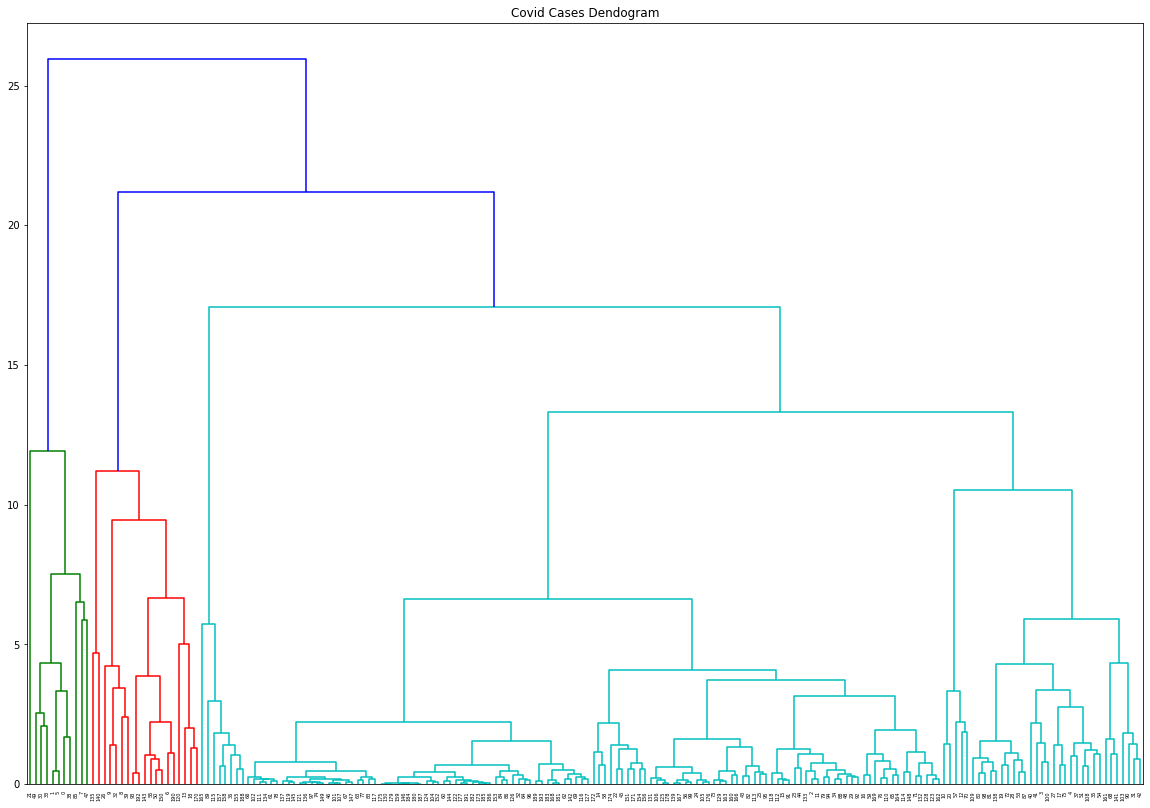

In [679]:
#Using the previous function to show the dendogram
show_dendogram(covid_scaled_data2_trans)

It seems that we have three clusters. However I need to check this step, since the third cluster looks was preaded than the others

### Step4 Repeat step 3 using the Elbow method (i.e., scree plot)
### wcss elbow method

In [680]:
#Define function to compute withinness sum of squares (wss)
from sklearn.cluster import KMeans

def calculate_wcss(covid_data):
    wcss = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters=n, random_state=0)
        kmeans.fit(X=covid_data)
        wcss.append(kmeans.inertia_)
    
    return wcss

In [681]:
#call the function to compute wss
wcsscv = calculate_wcss(covid_scaled_data2_trans)

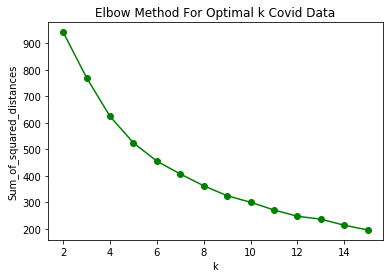

In [682]:
#plot the scree plot
plt.plot(range(2,16), wcsscv, '-go')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k Covid Data')
plt.show()

We are Able to see 3 cluster. It matched with the dendogram at Step 3.

### Ploting the clusters 

TypeError: scatter() got multiple values for argument 's'

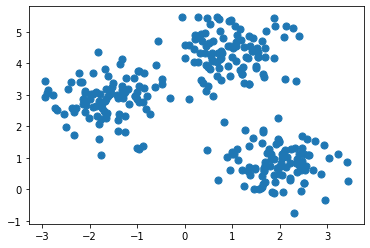

In [683]:
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0)

#plt.scatter(X[ : , 0], X[ : , 1] , s =50, c=’b’)

plt.scatter(X[:, 0], X[:, 1], s=50);

plt.scatter(-0.25133228, -0.27657993, -0.32529548, -0.23733462, -0.22655202, -0.20614269,
  -0.05624437, s=200) 

plt.scatter(-0.26796001,  2.65025998,  1.19688137,  2.44965456,  1.90005033,  2.28756462,
   0.569292, s=200) 

plt.scatter(2.32802975,  0.23678361,  1.79442398,  0.06466948,  0.40776678, -0.07003359,
   0.02419572, s=200)

plt.show()

# Step 5 Using the optimal number of clusters determined in Step 3

###  above (more conclusive than the Elbow method), implement cluster analysis using k-means and hierarchical (i.e.,

## AgglomarativeClustering) techniques. Note: you are told to implement only two clustering techniques. I don’t want people to just copy code from class examples without paying attention to what they are doing.


## If you implement any other approaches other than these 2 (i.e., you are just copying class code without paying attention), 5 marks will be deducted from your work.

These two approaches were selected for analysis here because they are by far the most commonly used clustering techniques.

###  KMEANS APPROACH Using three clusters as showed in step 3

In [684]:
from sklearn.cluster import KMeans # using k means as suggested 

# running kmeans to our optimal number of clusters which is 3
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(covid_scaled_data2_trans)

print(clusters)


# The results are d


[1 1 0 0 0 1 2 1 2 2 0 0 1 2 0 0 0 0 2 0 2 1 0 0 0 0 2 2 0 0 1 0 2 1 0 0 0
 0 1 2 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0]


In [685]:
#generate cluster centers
centers = kmeans.cluster_centers_
print(centers)

[[-0.25133228 -0.27657993 -0.32529548 -0.23733462 -0.22655202 -0.20614269
  -0.05624437]
 [-0.26796001  2.65025998  1.19688137  2.44965456  1.90005033  2.28756462
   0.569292  ]
 [ 2.32802975  0.23678361  1.79442398  0.06466948  0.40776678 -0.07003359
   0.02419572]]


In [686]:
#Follow the approach strategy we need to convert the cluster centers to a DataFrame
#define column headers/names
df_cols = ['Mortality_rate', 'Cases_per_ml', 'Deaths_per_ml', 'Recovered_per_ml', 'Active_per_ml', 'Critical_per_ml',
           'Tests_per_ml']

clusters_df = pd.DataFrame(centers)
clusters_df.columns = df_cols
print(clusters_df)

   Mortality_rate  Cases_per_ml  Deaths_per_ml  Recovered_per_ml  \
0       -0.251332     -0.276580      -0.325295         -0.237335   
1       -0.267960      2.650260       1.196881          2.449655   
2        2.328030      0.236784       1.794424          0.064669   

   Active_per_ml  Critical_per_ml  Tests_per_ml  
0      -0.226552        -0.206143     -0.056244  
1       1.900050         2.287565      0.569292  
2       0.407767        -0.070034      0.024196  


### HIERARCHICAL CLUSTERING APPROACH

In [687]:
import numpy as np

from sklearn.cluster import AgglomerativeClustering
#create an instance of AgglomerativeClustering
hierarchclust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

#fit the data and generate cluster labels
clusters_hca = hierarchclust.fit_predict (covid_scaled_data2_trans)

print(clusters_hca)

[1 1 0 0 0 1 2 1 2 2 0 0 0 2 0 0 0 0 2 0 0 1 0 0 0 0 2 0 0 0 1 0 2 1 0 0 0
 0 1 2 0 0 0 0 0 0 0 1 0 1 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0]


In [743]:
#pd.DataFrame(covid_scaled_data2_trans)

,0,1,2,3,4,5,6
0,0.140172,1.961777,2.138489,0.880126,4.299014,2.794194,0.667439
1,0.169068,1.551085,1.778281,1.133636,1.952318,2.076678,-0.359577
2,-0.183282,-0.415172,-0.387439,-0.363635,-0.331656,-0.039862,-0.469146
3,-0.411452,0.556579,0.008182,0.458843,0.617635,0.562011,0.878918
4,-0.469333,0.741634,0.009664,0.319864,1.777936,0.129033,-0.204460
...,...,...,...,...,...,...,...
189,-0.835791,-0.541253,-0.509341,-0.433773,-0.565253,-0.459924,0.211819
190,1.374800,-0.069185,0.716509,0.013335,-0.399683,-0.459924,-0.450503
191,-0.835791,-0.508218,-0.509341,-0.424236,-0.470739,-0.459924,-0.417549
192,2.480096,-0.533533,-0.306985,-0.433144,-0.565253,-0.459924,-0.431300


In [1]:
#This approach requires to append cluster labels (membership) to  the dataset
#covid_scaled_data2_trans['Clust_mem'] = clusters_hca
#covid_scaled_data2_trans.head()

In [694]:
#covid_scaled_data2_trans.dtype = clusters_hca
#covid_scaled_data2_trans.head()

dtype('float64')

In [ ]:
#df_hc = pd.DataFrame(covid_scaled_data2_trans.groupby('Clust_mem').mean().round(3))
#print(df_hc)

## Step 6 Compare the strenth of cluster solutions of the two approaches using the following metrics: silhouette_score, calinski_harabasz_score, davies_bouldin_score.

In [699]:
#First We should import Metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Kmeans

### Silhouette

In [702]:
# This is for the kmeans approach
silhouette_score(covid_scaled_data2_trans, clusters, metric='euclidean')


0.5310315622336387

### calinski_harabasz

In [703]:
calinski_harabasz_score(covid_scaled_data2_trans, clusters)

72.88634114982202

### davies_bouldin_score

In [704]:
davies_bouldin_score(covid_scaled_data2_trans, clusters)

1.1693915881286654

## Step 8 Based on the results of the chosen technique, append cluster membership variable/feature to the data frame you obtained in step 2. i) above (i.e., the data frame containing country column). Yes, I did tell you to keep it intact! Save the data frame to file as a CSV file.

In [287]:
#Hierarchical clustering This one will not work because i could not figure out the mistake on the hierarchical

#silhouette_score(covid_scaled_data2_trans, clusters_ac, metric='euclidean')

In [708]:
hclust_tot = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

clusters_subseq = hclust_tot.fit_predict(covid_df_selected_subsequence_noCountry)

covid_df_selected_subsequence_noCountry['Clust_mem'] = clusters_subseq



In [709]:
covid_df_selected_subsequence_noCountry.head()

,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml,Clust_mem
0,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666,2
1,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056,0
2,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264,0
3,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018,2
4,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094,0


In [714]:
covid_subsequence_analysis_data =pd.concat([df_country2,covid_df_selected_subsequence_noCountry], axis=1)
covid_subsequence_analysis_data.head()

,Country,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml,Clust_mem
0,USA,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666,2
1,Brazil,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056,0
2,India,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264,0
3,Russia,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018,2
4,South Africa,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094,0


In [715]:
print (covid_subsequence_analysis_data)

                    Country  Mortality_rate  Cases_per_ml  Deaths_per_ml  \
0                       USA        0.036791  11760.730086     432.691202   
1                    Brazil        0.037880   9868.624239     373.828305   
2                     India        0.024598    809.846161      19.920454   
3                    Russia        0.015996   5286.818101      84.570342   
4              South Africa        0.013814   6139.385078      84.812381   
..                      ...             ...           ...            ...   
205               Greenland        0.000000    228.974020       0.000000   
206              Montserrat        0.083333   2403.846154     200.320513   
209   Caribbean Netherlands        0.000000    381.170192       0.000000   
210  British Virgin Islands        0.125000    264.541516      33.067690   
211               St. Barth        0.000000    607.348922       0.000000   

     Recovered_per_ml  Active_per_ml  Critical_per_ml   Tests_per_ml  \
0         5442.

In [716]:
covid_subsequence_analysis_data.to_csv('covid_subsequence_analysis_data.csv')

## Step 9


## Generate a data frame of cluster centers (means) and also save it to a CSV file. Note: even though we are using scaled data ##to obtain cluster solution, we append cluster membershiop feature and generate cluster centers using unscaled data for easy interpretation.

In [719]:
from sklearn.preprocessing import StandardScaler

data = covid_df_selected_subsequence_noCountry
scaler = StandardScaler()
print(scaler.fit(data))



print(scaler.transform(data))

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.14017235  1.96177707  2.13848903 ...  2.79419387  0.66743852
   2.43517568]
 [ 0.16906839  1.55108523  1.77828074 ...  2.07667778 -0.35957659
  -0.42800057]
 [-0.18328212 -0.41517171 -0.38743905 ... -0.03986186 -0.46914575
  -0.42800057]
 ...
 [-0.835791   -0.50821815 -0.50934119 ... -0.45992421 -0.41754922
  -0.42800057]
 [ 2.48009612 -0.53353304 -0.30698526 ... -0.45992421 -0.43129989
  -0.42800057]
 [-0.835791   -0.45912483 -0.50934119 ... -0.45992421  0.20638452
  -0.42800057]]


In [720]:
print(scaler.mean_)

[3.15070661e-02 2.72259128e+03 8.32332258e+01 1.95028993e+03
 6.83891189e+02 7.09289400e+00 6.61102553e+04 2.98969072e-01]


In [721]:
data.to_csv('cluster_center_step9.csv')

## Step 12 Open the CSV file you saved in step 8 above and perform a custom sort of the data using cluster membership variable from largest to smallest

In [722]:
d12 = pd.read_csv("covid_subsequence_analysis_data.csv")

In [727]:
d12.head()

,Country,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml,Clust_mem
0,USA,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666,2
1,Brazil,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056,0
2,India,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264,0
3,Russia,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018,2
4,South Africa,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094,0


In [726]:
d12 = d12.drop('Unnamed: 0', axis = 1)
print(d12)

                    Country  Mortality_rate  Cases_per_ml  Deaths_per_ml  \
0                       USA        0.036791  11760.730086     432.691202   
1                    Brazil        0.037880   9868.624239     373.828305   
2                     India        0.024598    809.846161      19.920454   
3                    Russia        0.015996   5286.818101      84.570342   
4              South Africa        0.013814   6139.385078      84.812381   
..                      ...             ...           ...            ...   
189               Greenland        0.000000    228.974020       0.000000   
190              Montserrat        0.083333   2403.846154     200.320513   
191   Caribbean Netherlands        0.000000    381.170192       0.000000   
192  British Virgin Islands        0.125000    264.541516      33.067690   
193               St. Barth        0.000000    607.348922       0.000000   

     Recovered_per_ml  Active_per_ml  Critical_per_ml   Tests_per_ml  \
0         5442.

In [733]:


# sort Brand - ascending order
d12.sort_values(by=['Clust_mem'], inplace=True, ascending= False )

d12.head()

,Country,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml,Clust_mem
165,Monaco,0.036697,2776.716342,101.897847,2496.497261,178.321233,0.000000,973353.712903,3
140,San Marino,0.060086,20598.202446,1237.660233,19331.074112,29.468101,0.000000,168822.749374,2
21,Qatar,0.001472,37982.694667,55.915564,36817.727727,1109.051376,45.587211,157311.494210,2
13,Italy,0.143372,4043.093982,579.666612,3257.661850,205.765520,0.810491,103181.302001,2
8,Spain,0.092472,6573.207709,607.840184,3208.164239,1752.876777,13.196249,128892.190304,2


In [741]:
def color_negative_red(value):
  """
 
  """

  if value == 0:
    color = 'green'
  elif value == 1:
    color = 'yellow'
  else:
    color = 'red'

  return 'color: %s' % color

In [742]:
d12.style.applymap(color_negative_red)

,Country,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml,Clust_mem
165,Monaco,0.036697,2776.716342,101.897847,2496.497261,178.321233,0.000000,973353.712903,3
140,San Marino,0.060086,20598.202446,1237.660233,19331.074112,29.468101,0.000000,168822.749374,2
21,Qatar,0.001472,37982.694667,55.915564,36817.727727,1109.051376,45.587211,157311.494210,2
13,Italy,0.143372,4043.093982,579.666612,3257.661850,205.765520,0.810491,103181.302001,2
8,Spain,0.092472,6573.207709,607.840184,3208.164239,1752.876777,13.196249,128892.190304,2
9,UK,0.153668,4341.333887,667.122666,5.066009,3669.145211,2.091201,195770.651415,2
3,Russia,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018,2
141,Malta,0.013294,1533.054651,20.380342,1499.087414,13.586895,0.000000,254534.626202,2
42,Singapore,0.000564,8186.521185,4.613376,7532.788716,649.119093,0.000000,172494.471211,2
100,Maldives,0.005057,5482.916261,27.728842,4366.368243,1088.819177,22.183073,124343.519677,2


In [ ]:
d12.to_csv('cluster_center_step9.csv')